1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


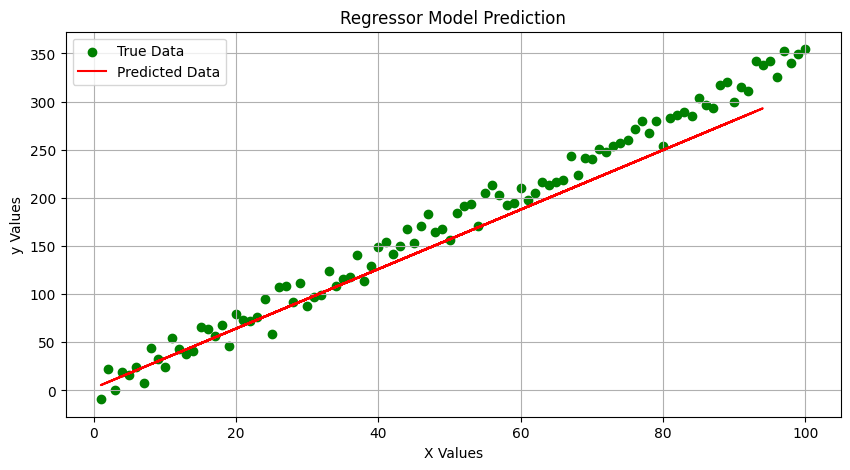

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Regression MSE: 597.6931130124165
Classification Accuracy: 0.8966666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       156
           1       0.90      0.88      0.89       144

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



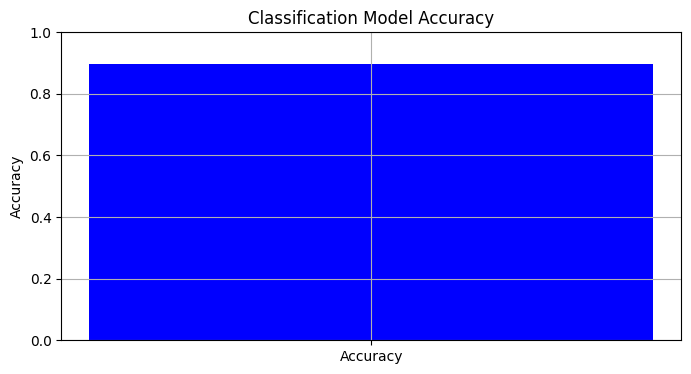

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Seed for reproducibility
np.random.seed(30)
tf.random.set_seed(30)

# 1. Regression Task: Generate synthetic data and train a regression model with TensorFlow
# Create synthetic regression data
X_reg = np.linspace(1, 100, 100).reshape(-1, 1)  # Independent variable
y_reg = 3.5 * X_reg.flatten() + np.random.normal(0, 10, X_reg.shape[0])  # Dependent variable with noise

# Train-test split for regression data
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.25, random_state=30)

# Define the regression model using Input layer
reg_model = Sequential([
    Input(shape=(1,)),  # Input layer
    Dense(15, activation="relu"),
    Dense(1)  # Output layer for regression
])
reg_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model
reg_model.fit(X_reg_train, y_reg_train, epochs=150, verbose=0)

# Predict and evaluate
y_reg_pred = reg_model.predict(X_reg_test)
mse_reg = mean_squared_error(y_reg_test, y_reg_pred)

# Plot results for regression
plt.figure(figsize=(10, 5))
plt.scatter(X_reg, y_reg, color='green', label='True Data')
plt.plot(X_reg_test, y_reg_pred, color='red', label='Predicted Data')
plt.xlabel("X Values")
plt.ylabel("y Values")
plt.title("Regressor Model Prediction")
plt.legend()
plt.grid(True)
plt.show()

# 2. Classification Task: Generate synthetic classification data and train a model
# Generate synthetic classification data
X_clf, y_clf = make_classification(n_samples=1500, n_features=12, n_classes=2, random_state=30)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=30)

# Define the classification model using Input layer
clf_model = Sequential([
    Input(shape=(X_clf.shape[1],)),  # Input layer
    Dense(20, activation="relu"),
    Dense(15, activation="relu"),
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])
clf_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the classification model
clf_model.fit(X_clf_train, y_clf_train, epochs=80, verbose=0)

# Predict and evaluate classification model
y_clf_pred_prob = clf_model.predict(X_clf_test)
y_clf_pred = (y_clf_pred_prob > 0.5).astype(int).flatten()

# Classification accuracy
accuracy_clf = accuracy_score(y_clf_test, y_clf_pred)

# Full classification report
clf_report = classification_report(y_clf_test, y_clf_pred)

print("Regression MSE:", mse_reg)
print("Classification Accuracy:", accuracy_clf)
print("\nClassification Report:\n", clf_report)

# Visualization of classification accuracy
plt.figure(figsize=(8, 4))
plt.bar(['Accuracy'], [accuracy_clf], color='blue')
plt.ylim(0, 1)
plt.title('Classification Model Accuracy')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
